In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


### Importing Data via an API

In [17]:
import kagglehub
#Download Latest version
path= kagglehub.dataset_download("karthickveerakumar/salary-data-simple-linear-regression")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Priyanshi Sharma\.cache\kagglehub\datasets\karthickveerakumar\salary-data-simple-linear-regression\versions\1


In [18]:
csv_path=f"{path}/Salary_Data.csv"

#Load and print the dataset
df=pd.read_csv(csv_path)
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


### Displaying the first five rows of the dataset

In [19]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Checking the shape(no. of rows and no. of columns)

In [20]:
df.shape

(30, 2)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [22]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [23]:
df.duplicated().sum()

0

In [24]:
df[df.duplicated()]

,YearsExperience,Salary


In [25]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [26]:
df.isnull().sum()/len(df)*100

YearsExperience    0.0
Salary             0.0
dtype: float64

In [27]:
df.isnull().sum(axis=1).sort_values(ascending=False)

0     0
1     0
28    0
27    0
26    0
25    0
24    0
23    0
22    0
21    0
20    0
19    0
18    0
17    0
16    0
15    0
14    0
13    0
12    0
11    0
10    0
9     0
8     0
7     0
6     0
5     0
4     0
3     0
2     0
29    0
dtype: int64

### Finding the unique values 

In [28]:
df['Salary'].unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [29]:
df['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [30]:
x=df[['YearsExperience']]
y=df[['Salary']]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
print(x_train.shape)

(21, 1)


In [33]:
model=LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(x_test)

In [36]:
print(y_pred)

[[115573.62288352]
 [ 71679.93878159]
 [102498.90847018]
 [ 75415.57147111]
 [ 55803.4998511 ]
 [ 60473.04071301]
 [122110.98009019]
 [107168.44933209]
 [ 63274.76523015]]


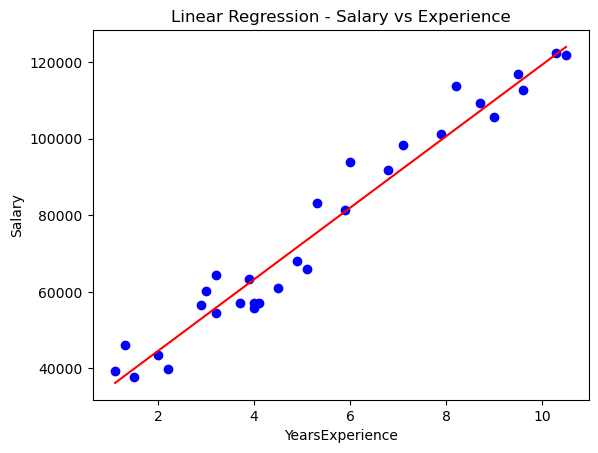

In [37]:
plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Linear Regression - Salary vs Experience")
plt.show()


### Calculating r^2 i.e. Relational Score

In [38]:
#Model accuracy (R^2 score)
r2=r2_score(y_test,y_pred)
print(r2)

0.9414466227178214


In [39]:
try:
    experience = float(input("Enter years of experience"))
    prediction = model.predict([[experience]])
    print(f"Predicted Salary : Rs{prediction[0][0]:.2f}")
except ValueError:
    print("Please enter a valid number")
    
                       

Enter years of experience 1


Predicted Salary : Rs35257.52


C:\Users\Priyanshi Sharma\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')
